<a href="https://colab.research.google.com/github/Park-kxng/titanic_survivor_prediction/blob/main/%08Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2013075 박근영

#  1 - Prob1 : Your Best Image Classification Model

In [ ]:
# Import Modules
import torch
import torchvision
import torch.nn as nn # 인공신경망 연산을 위한 라이브러리
import torch.optim as optim # 모델 최적화
import torch.nn.init as init # 텐서 초기화를 위해 필요
from   torch.utils.data import DataLoader, Dataset

from torchvision import transforms
import torchvision.transforms as tr

import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models

100%|██████████| 170498071/170498071 [00:13<00:00, 12201698.64it/s]


Extracting /content/drive/MyDrive/cifar-10-python.tar.gz to /content/drive/MyDrive
Files already downloaded and verified


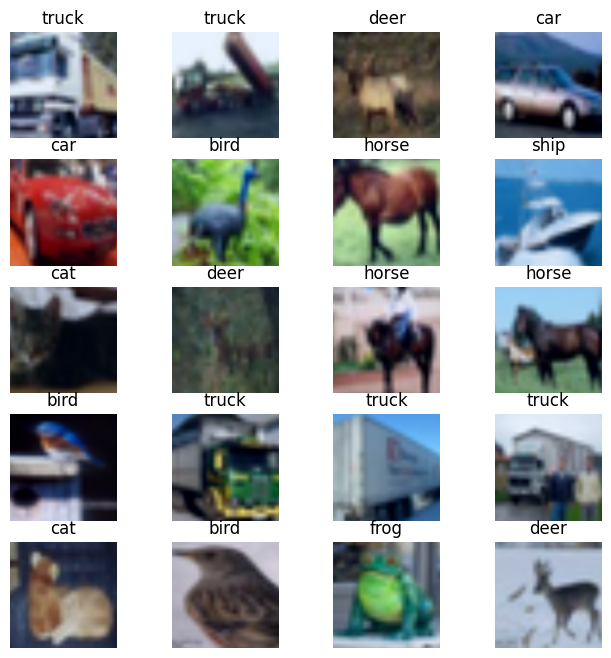

In [ ]:
# Data Preparation

transf = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406] , std = [0.229, 0.224, 0.225]),
])

train_dataset = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive',download = True, train=True, transform = transf)
test_dataset = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive',download = True, train=False, transform = transf)

train_loader = DataLoader(train_dataset, batch_size = 32)
test_loader = DataLoader(test_dataset, batch_size = 32)

classes ={0:'plane',1:'car',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck',} #class names
images,labels = next(iter(train_loader))

flg = plt.figure(figsize=(8,8))
columns = 4
rows = 5

for i in range(1,columns*rows+1):
  img = images[i].permute(1,2,0).numpy()
  img = img * 0.225 + 0.406  # 역정규화
  img = np.clip(img, 0, 1)  # 범위를 0과 1 사이로 클리핑
  flg.add_subplot(rows,columns,i)
  plt.title(classes[labels[i].item()]) # 숫자를 아이템으로 뽑아와서 매칭되어 있는 value로 가져옴.
  plt.axis('off')
  plt.imshow(img)
plt.show()

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)

        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                epoch,
                batch_idx * len(data),
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item()))

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for data in test_loader:
            data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
            output = model(data)
            _,predicted = torch.max(output,1)
            total += labels.size(0) # 갯수 누적
            correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


    test_accuracy = 100. * correct / total
    return test_accuracy

## 1-1) 시도 1 : 사전 훈련된 vgg16모델을 사용
- optimizer를 Adam과 학습률을 0.001로 설정함
- week13 강의안의 <사전 훈련된 VGG16에 CIFAR10 데이터 학습하기>의 내용을 참고


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.352441
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.323451
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.322028
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.142133
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.310652
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.351706
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.117726
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.209062
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.165378
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.229996
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 2.154821
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 2.107467
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.996962
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 2.004655
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.919931
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 2.042085
[epoch : 1] , accuracy: 31.07%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.719158
Epochs: 2  

In [ ]:
model = models.vgg16(pretrained = True)
model.classifier[6] = nn.Linear(in_features=4096, out_features=10)
model.to("cuda:0")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
optimizer = optim.Adam(model.parameters(),lr = 0.001)
loss_func = nn.CrossEntropyLoss()

for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(DEVICE), target.to(DEVICE)

      optimizer.zero_grad()
      output = model.forward(data)
      loss = loss_func(output, target)
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
          print("Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
              batch_idx * len(data),
              len(train_loader.dataset),
              100. * batch_idx / len(train_loader),
              loss.item()))

Train Epoch: [0/50000 (0%)]	Loss: 2.345560
Train Epoch: [3200/50000 (6%)]	Loss: 2.429188
Train Epoch: [6400/50000 (13%)]	Loss: 1.920325
Train Epoch: [9600/50000 (19%)]	Loss: 2.261743
Train Epoch: [12800/50000 (26%)]	Loss: 2.179909
Train Epoch: [16000/50000 (32%)]	Loss: 1.855503
Train Epoch: [19200/50000 (38%)]	Loss: 1.895153
Train Epoch: [22400/50000 (45%)]	Loss: 2.060506
Train Epoch: [25600/50000 (51%)]	Loss: 1.646120
Train Epoch: [28800/50000 (58%)]	Loss: 1.539196
Train Epoch: [32000/50000 (64%)]	Loss: 1.531887
Train Epoch: [35200/50000 (70%)]	Loss: 1.751208
Train Epoch: [38400/50000 (77%)]	Loss: 1.839286
Train Epoch: [41600/50000 (83%)]	Loss: 1.666904
Train Epoch: [44800/50000 (90%)]	Loss: 1.566560
Train Epoch: [48000/50000 (96%)]	Loss: 2.070955


In [ ]:
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for data in test_loader:
        data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        output = model(data)
        _,predicted = torch.max(output,1)
        total += labels.size(0) # 갯수 누적
        correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


test_accuracy = 100. * correct / total
print("accuracy: {:.2f}%\n".format(test_accuracy))

accuracy: 41.70%



## 1-2) 시도 2 : 하이퍼파라미터 튜닝
- optimizer를 SGD로 변경


In [ ]:
model = models.vgg16(pretrained = True)
model.classifier[6] = nn.Linear(in_features=4096, out_features=10)
model.to("cuda:0")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
optimizer = optim.SGD(model.parameters(),lr = 0.01)
loss_func = nn.CrossEntropyLoss()

for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(DEVICE), target.to(DEVICE)

      optimizer.zero_grad()
      output = model.forward(data)
      loss = loss_func(output, target)
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
          print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
              epoch,
              batch_idx * len(data),
              len(train_loader.dataset),
              100. * batch_idx / len(train_loader),
              loss.item()))

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.383693
Train Epoch: 1 [3200/50000 (6%)]	Loss: 0.729877
Train Epoch: 1 [6400/50000 (13%)]	Loss: 0.688577
Train Epoch: 1 [9600/50000 (19%)]	Loss: 0.694206
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.320088
Train Epoch: 1 [16000/50000 (32%)]	Loss: 0.675874
Train Epoch: 1 [19200/50000 (38%)]	Loss: 0.716774
Train Epoch: 1 [22400/50000 (45%)]	Loss: 0.543266
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.242020
Train Epoch: 1 [28800/50000 (58%)]	Loss: 0.162393
Train Epoch: 1 [32000/50000 (64%)]	Loss: 0.327472
Train Epoch: 1 [35200/50000 (70%)]	Loss: 0.477433
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.248691
Train Epoch: 1 [41600/50000 (83%)]	Loss: 0.325414
Train Epoch: 1 [44800/50000 (90%)]	Loss: 0.388096
Train Epoch: 1 [48000/50000 (96%)]	Loss: 0.671779


In [ ]:
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for data in test_loader:
        data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        output = model(data)
        _,predicted = torch.max(output,1)
        total += labels.size(0) # 갯수 누적
        correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


test_accuracy = 100. * correct / total
print("[{}] , accuracy: {:.2f}%\n".format(test_accuracy))

[1] , accuracy: 89.79%



## 1-3) 시도 3 : epoch 횟수 2개로 증가, optimizer를 SGD로 설정

In [ ]:
model = models.vgg16(pretrained = True)
model.classifier[6] = nn.Linear(in_features=4096, out_features=10)
model.to("cuda:0")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 207MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
optimizer = optim.SGD(model.parameters(),lr = 0.01)
loss_func = nn.CrossEntropyLoss()
EPOCHS = 2
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_accuracy = evaluate(model, test_loader)
    print("[{}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.403231
Train Epoch: 1 [3200/50000 (6%)]	Loss: 0.783126
Train Epoch: 1 [6400/50000 (13%)]	Loss: 0.901718
Train Epoch: 1 [9600/50000 (19%)]	Loss: 0.872520
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.280505
Train Epoch: 1 [16000/50000 (32%)]	Loss: 0.887234
Train Epoch: 1 [19200/50000 (38%)]	Loss: 0.939951
Train Epoch: 1 [22400/50000 (45%)]	Loss: 0.710191
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.342461
Train Epoch: 1 [28800/50000 (58%)]	Loss: 0.158152
Train Epoch: 1 [32000/50000 (64%)]	Loss: 0.262029
Train Epoch: 1 [35200/50000 (70%)]	Loss: 0.503003
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.275766
Train Epoch: 1 [41600/50000 (83%)]	Loss: 0.270625
Train Epoch: 1 [44800/50000 (90%)]	Loss: 0.567336
Train Epoch: 1 [48000/50000 (96%)]	Loss: 0.768309
[1] , accuracy: 90.78%

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.150071
Train Epoch: 2 [3200/50000 (6%)]	Loss: 0.174677
Train Epoch: 2 [6400/50000 (13%)]	Loss: 0.278514
Train Epoch: 2 [9600/50000 (19%)]	Loss: 0.4

**최종 성능은 95.15%로 모델3(epoch 횟수 2개로 증가, optimizer를 SGD로 설정)에서 가장 높은 성능을 기록함**



## 1-4) torch.save & load 확인
: 저장한 모델을 불러와서 사용하는 데에 문제가 없는지 확인

In [ ]:
torch.save(model, '2013075_박근영.pt')

In [ ]:
saved_model = torch.load('2013075_박근영.pt')

In [ ]:
# 저장한 모델을 불러와서 정확도를 측정
saved_model.eval()
total = 0
correct = 0
with torch.no_grad():
    for data in test_loader:
        data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        output = saved_model(data)
        _,predicted = torch.max(output,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


test_accuracy = 100. * correct / total
print("accuracy: {:.2f}%\n".format(test_accuracy))

accuracy: 95.15%



In [ ]:
from google.colab import files

# 다운로드할 파일 경로 지정
file_path = "2013075_박근영.pt"

# 파일 다운로드
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- 저장함 모델을 torch.save를 통해 저장하고, torch.load를 통해 불러오는 것을 성공했음
- 저장하기 전에 확인한 정확도와 같은 95.15%의 정확도가 측정되었음.



#  2 - Prob2 : Image Classification with the New Dataset

## 2-1) 시도 1 : CNN
- resize : 256, 정규화 실행
- 강의안(week12의 CNN모델 학습)의 CNN모델을 참고하여 모델 작성
- epoch 횟수 : 100 , 손실함수 : CrossEntropyLoss(), 옵티마이저 : SGD, 학습률 0.001
- 정확도 49.25%가 나왔음.-> 성능을 더 높이기 위해 다양한 모델을 사용해볼 필요성을 느낌

In [ ]:
# Import Modules
import torch
import torchvision
import torch.nn as nn # 인공신경망 연산을 위한 라이브러리
import torch.optim as optim # 모델 최적화
import torch.nn.init as init # 텐서 초기화를 위해 필요
from   torch.utils.data import DataLoader, Dataset

from torchvision import transforms
import torchvision.transforms as tr

import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models

Files already downloaded and verified
Files already downloaded and verified


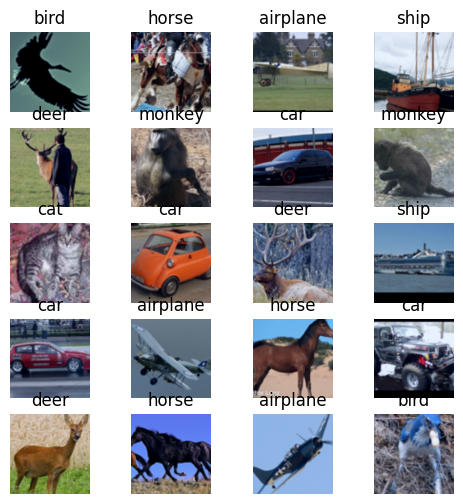

cuda:0


In [ ]:
# Data Preparation

transf = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406] , std = [0.229, 0.224, 0.225]),
])
train_dataset = torchvision.datasets.STL10(root = '/content/drive/MyDrive',split = 'train',download = True, transform = transf)
test_dataset = torchvision.datasets.STL10(root = '/content/drive/MyDrive',split = 'test',download = True, transform = transf)

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True, drop_last = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False, drop_last = True)

#class names
classes ={0:'airplane',1:'bird',2:'car',3:'cat',4:'deer',5:'dog',6:'horse',7:'monkey',8:'ship',9:'truck',}
images,labels = next(iter(train_loader))

# data visualization
flg = plt.figure(figsize=(6,6))
columns = 4
rows = 5

for i in range(1,columns*rows+1):
  img = images[i].permute(1,2,0).numpy()
  img = img * 0.225 + 0.406  # 역정규화
  img = np.clip(img, 0, 1)  # 범위를 0과 1 사이로 클리핑
  flg.add_subplot(rows,columns,i)
  plt.title(classes[labels[i].item()]) # 숫자를 아이템으로 뽑아와서 매칭되어 있는 value로 가져옴.
  plt.axis('off')
  plt.imshow(img)
plt.show()

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

In [ ]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# 모델 초기화
num_classes = 10  # STL-10 데이터셋의 클래스 수에 맞게 설정
model = CNNModel(num_classes).to(DEVICE)

# 손실 함수 및 최적화 알고리즘 설정
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [ ]:
EPOCHS = 100
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)

        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                epoch,
                batch_idx * len(data),
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item()))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 0.035350
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 0.013683
Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 0.034384
Epochs: 2  Train Epoch: [3200/5000 (64%)]	Loss: 0.042925
Epochs: 3  Train Epoch: [0/5000 (0%)]	Loss: 0.016328
Epochs: 3  Train Epoch: [3200/5000 (64%)]	Loss: 0.007814
Epochs: 4  Train Epoch: [0/5000 (0%)]	Loss: 0.003412
Epochs: 4  Train Epoch: [3200/5000 (64%)]	Loss: 0.004145
Epochs: 5  Train Epoch: [0/5000 (0%)]	Loss: 0.002068
Epochs: 5  Train Epoch: [3200/5000 (64%)]	Loss: 0.003319
Epochs: 6  Train Epoch: [0/5000 (0%)]	Loss: 0.002774
Epochs: 6  Train Epoch: [3200/5000 (64%)]	Loss: 0.002578
Epochs: 7  Train Epoch: [0/5000 (0%)]	Loss: 0.002776
Epochs: 7  Train Epoch: [3200/5000 (64%)]	Loss: 0.003018
Epochs: 8  Train Epoch: [0/5000 (0%)]	Loss: 0.004515
Epochs: 8  Train Epoch: [3200/5000 (64%)]	Loss: 0.001810
Epochs: 9  Train Epoch: [0/5000 (0%)]	Loss: 0.001991
Epochs: 9  Train Epoch: [3200/5000 (64%)]	Loss: 0.002089
Epochs: 10

In [ ]:
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for data in test_loader:
        data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        output = model(data)
        _,predicted = torch.max(output,1)
        total += labels.size(0) # 갯수 누적
        correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


test_accuracy = 100. * correct / total
print("[epoch : {}] , accuracy: {:.2f}%\n".format(EPOCHS,test_accuracy))

[epoch : 100] , accuracy: 49.25%



## 2-2) 시도 2 : AlexNet
- 시도 1에서 사용한 데이터셋을 그대로 사용함.
- week13 강의안의 <AlextNet>의 내용을 참고.
- epoch : 50번, 손실함수 : CrossEntropyLoss(), 옵티마이저 : SGD, 학습률 0.001
-->  성능: 10.21%


In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 192, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [ ]:
model = AlexNet().to(DEVICE)

# 손실 함수 및 최적화 알고리즘 설정
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
EPOCHS = 50
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)

        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                epoch,
                batch_idx * len(data),
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item()))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.303673
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 2.300292
Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 2.303003
Epochs: 2  Train Epoch: [3200/5000 (64%)]	Loss: 2.299944
Epochs: 3  Train Epoch: [0/5000 (0%)]	Loss: 2.304082
Epochs: 3  Train Epoch: [3200/5000 (64%)]	Loss: 2.302916
Epochs: 4  Train Epoch: [0/5000 (0%)]	Loss: 2.301815
Epochs: 4  Train Epoch: [3200/5000 (64%)]	Loss: 2.301559
Epochs: 5  Train Epoch: [0/5000 (0%)]	Loss: 2.301761
Epochs: 5  Train Epoch: [3200/5000 (64%)]	Loss: 2.302832
Epochs: 6  Train Epoch: [0/5000 (0%)]	Loss: 2.302799
Epochs: 6  Train Epoch: [3200/5000 (64%)]	Loss: 2.304333
Epochs: 7  Train Epoch: [0/5000 (0%)]	Loss: 2.303235
Epochs: 7  Train Epoch: [3200/5000 (64%)]	Loss: 2.303442
Epochs: 8  Train Epoch: [0/5000 (0%)]	Loss: 2.301661
Epochs: 8  Train Epoch: [3200/5000 (64%)]	Loss: 2.302637
Epochs: 9  Train Epoch: [0/5000 (0%)]	Loss: 2.301594
Epochs: 9  Train Epoch: [3200/5000 (64%)]	Loss: 2.304558
Epochs: 10

In [ ]:
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for data in test_loader:
        data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        output = model(data)
        _,predicted = torch.max(output,1)
        total += labels.size(0) # 갯수 누적
        correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


test_accuracy = 100. * correct / total
print("[epoch : {}] , accuracy: {:.2f}%\n".format(EPOCHS,test_accuracy))

[epoch : 50] , accuracy: 10.21%



## 2-3) 시도 3 : VGG16
- week13의 VGG16모델 코드를 참고하여 작성
- batchsize : 32, resize : 224
- 손실함수 :CrossEntropyLoss, optimizer :SGD , epoch:10, 학습률 :0.0001
- 성능 : 50.67%


In [ ]:
BATCH_SIZE = 32
num_classes = 10

100%|██████████| 2640397119/2640397119 [02:28<00:00, 17790084.52it/s]


Extracting /content/drive/MyDrive/stl10_binary.tar.gz to /content/drive/MyDrive
Files already downloaded and verified


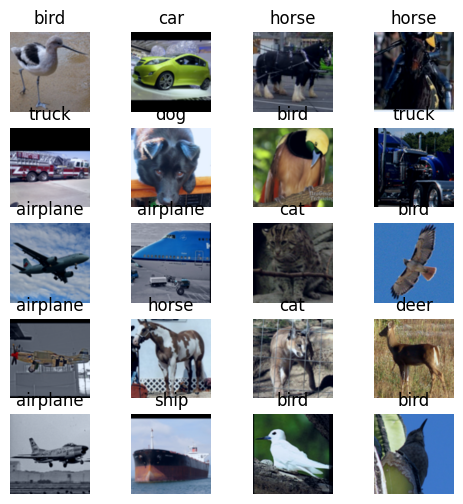

cpu


In [ ]:
# Data Preparation

transf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.STL10(root = '/content/drive/MyDrive',split = 'train',download = True, transform = transf)
test_dataset = torchvision.datasets.STL10(root = '/content/drive/MyDrive',split = 'test',download = True, transform = transf)

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, drop_last = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False, drop_last = True)

#class names
classes ={0:'airplane',1:'bird',2:'car',3:'cat',4:'deer',5:'dog',6:'horse',7:'monkey',8:'ship',9:'truck',}
images,labels = next(iter(train_loader))

# data visualization
flg = plt.figure(figsize=(6,6))
columns = 4
rows = 5

for i in range(1,columns*rows+1):
  img = images[i].permute(1,2,0).numpy()
  img = img * 0.225 + 0.406  # 역정규화
  img = np.clip(img, 0, 1)  # 범위를 0과 1 사이로 클리핑
  flg.add_subplot(rows,columns,i)
  plt.title(classes[labels[i].item()]) # 숫자를 아이템으로 뽑아와서 매칭되어 있는 value로 가져옴.
  plt.axis('off')
  plt.imshow(img)
plt.show()

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

In [ ]:
import torch.nn as nn

def conv_2_block(in_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_dim),  # Batch Normalization 추가
        nn.ReLU(),
        nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_dim),  # Batch Normalization 추가
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    return model

def conv_3_block(in_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_dim),  # Batch Normalization 추가
        nn.ReLU(),
        nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_dim),  # Batch Normalization 추가
        nn.ReLU(),
        nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_dim),  # Batch Normalization 추가
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    return model

class VGG(nn.Module):
    def __init__(self, num_classes):
        super(VGG, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3, 64),
            conv_2_block(64, 128),
            conv_3_block(128, 256),
            conv_3_block(256, 512),
            conv_3_block(512, 512)
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(25088 , 4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.330750
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.327516
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.342042
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.245923
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.331061
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.337038
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.314869
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.240816
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.277087
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.284654
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 2.373191
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 2.262576
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 2.290851
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 2.353673
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 2.307052
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 2.300436
[epoch : 1] , accuracy: 15.11%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 2.269197
Epochs: 2  

## 2-4) 시도 4 : VGG16 - optimizer만 변경
- batchsize : 32, resize : 224
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:10, 학습률 :0.0001
- 성능 : 57.09%



In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.326708
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.787832
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.179416
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.870300
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.282600
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.206844
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.061121
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.034570
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.215721
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 1.945353
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 1.667138
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 1.923815
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.694849
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.730515
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.840134
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 1.930899
[epoch : 1] , accuracy: 40.74%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.423977
Epochs: 2  

## 2-5) 시도 5 : VGG16 - 학습률 변경
- 시도 4에서 학습률만 변경하였음
- batchsize : 32, resize : 224
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:10, 학습률 :0.00001
- 성능 : 59.49% -> 성능이 향상된 것을 확인할 수 있음



In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.344773
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.270123
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.321384
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.239201
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.268716
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.191102
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.030208
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.126702
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.031794
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 1.896355
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 1.775043
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 1.763366
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.719898
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.689637
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.730481
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 2.028127
[epoch : 1] , accuracy: 37.86%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.651734
Epochs: 2  

## 2-6) 시도 6 : VGG16 - epoch 횟수 증가
- 시도 5에서 epoch 횟수만 변경하였음
- batchsize : 32, resize : 224
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:20, 학습률 :0.00001
- 성능 : 60.27% -> 성능이 향상된 것을 확인할 수 있음



In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
EPOCHS = 20
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.302933
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.279821
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.295979
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.163916
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.165982
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.266316
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.161547
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.137483
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 1.846214
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 1.840886
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 1.851225
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 1.798163
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.811321
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.697636
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.732400
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 1.611244
[epoch : 1] , accuracy: 37.19%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.769320
Epochs: 2  

## 2-7) 시도 7 : 직접 구현한 VGG16
- vgg16모델의 구조를 보고 직접 구현함.
- batchsize : 32
- 손실함수 :CrossEntropyLoss, optimizer :SGD , epoch:10, 학습률 :0.0001
- 성능 : 46.54% -> optimizer의 변경이 필요하다고 느낌.


In [ ]:
BATCH_SIZE = 32
num_classes = 10

100%|██████████| 2640397119/2640397119 [03:37<00:00, 12117502.99it/s]


Extracting /content/drive/MyDrive/stl10_binary.tar.gz to /content/drive/MyDrive
Files already downloaded and verified


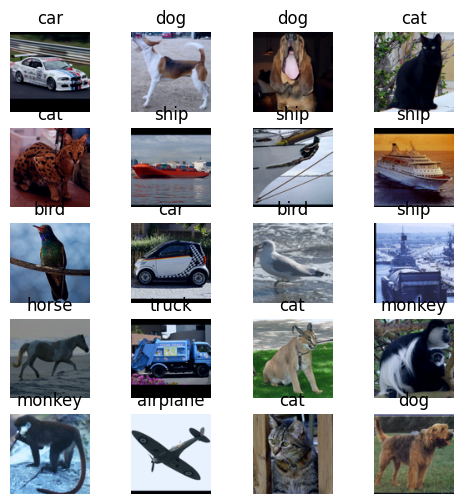

cuda:0


In [ ]:
# Data Preparation

transf = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.STL10(root = '/content/drive/MyDrive',split = 'train',download = True, transform = transf)
test_dataset = torchvision.datasets.STL10(root = '/content/drive/MyDrive',split = 'test',download = True, transform = transf)

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, drop_last = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False, drop_last = True)

#class names
classes ={0:'airplane',1:'bird',2:'car',3:'cat',4:'deer',5:'dog',6:'horse',7:'monkey',8:'ship',9:'truck',}
images,labels = next(iter(train_loader))

# data visualization
flg = plt.figure(figsize=(6,6))
columns = 4
rows = 5

for i in range(1,columns*rows+1):
  img = images[i].permute(1,2,0).numpy()
  img = img * 0.225 + 0.406  # 역정규화
  img = np.clip(img, 0, 1)  # 범위를 0과 1 사이로 클리핑
  flg.add_subplot(rows,columns,i)
  plt.title(classes[labels[i].item()]) # 숫자를 아이템으로 뽑아와서 매칭되어 있는 value로 가져옴.
  plt.axis('off')
  plt.imshow(img)
plt.show()

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

In [ ]:
import torch
import torch.nn as nn

class VGG(nn.Module):
    def __init__(self, num_classes):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.352070
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.367098
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.317048
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.326525
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.292466
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.302594
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.364753
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.329012
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.314337
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.330186
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 2.284872
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 2.288643
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 2.362780
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 2.353090
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 2.336866
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 2.291293
[epoch : 1] , accuracy: 11.79%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 2.280478
Epochs: 2  

## 2-8) 시도 8 : 직접 구현한 VGG16 - optimizer만 변경
- 시도 7에서 optimizer만 변경함
- batchsize : 32
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:10, 학습률 :0.0001
- 성능 : 51.70%


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.346316
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.678759
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.841586
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.201832
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.484876
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.349057
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.078118
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 1.982305
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 1.990597
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 1.806693
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 1.867180
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 2.279816
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.869089
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.797637
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.829054
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 1.857686
[epoch : 1] , accuracy: 24.68%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 2.026232
Epochs: 2  

## 2-9) 시도 9 : 직접 구현한 VGG16 - 학습률 변경
- 시도 8에서 optimizer만 변경함
- batchsize : 32
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:10, 학습률 :0.00001
- 성능 : 60.59%


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.305725
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.430682
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.330594
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.318295
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.167342
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.164050
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.298622
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.145726
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.083931
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.039816
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 1.842770
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 1.992166
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.733025
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.960802
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.834210
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 1.703865
[epoch : 1] , accuracy: 31.81%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.710957
Epochs: 2  

## 2-10) 시도 10 : 직접 구현한 VGG16 - 학습률과 epoch 횟수 변경
- 시도 8에서 학습률을 0.001로, epoch 횟수를 20으로 변경함
- batchsize : 32
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:10, 학습률 :0.001
- 성능 : 40.84% -> 학습률을 0.001로 설정하면 성능이 굉장히 떨어진다는 것을 발견함. 시도9에서 사용한 학습률을 유지하고 epoch횟수를 늘리는 방향으로 결정.


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 20
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.384281
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 4.478745
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 3.792415
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.719971
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.379989
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.492765
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.397092
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.369478
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.267558
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.271080
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 2.309859
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 2.181381
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 2.238343
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 2.257035
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 2.327060
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 2.233114
[epoch : 1] , accuracy: 13.51%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 2.252906
Epochs: 2  

## 2-11) 시도 11 : 직접 구현한 VGG16 - 학습률과 epoch 횟수 변경
- 시도 10의 결론에 의해 학습률을 0.00001로 설정하고 epoch횟수를 50으로 늘림
- batchsize : 32
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:50, 학습률 :0.00001
- 성능 : 64.64% -> epoch이 42일때 최고성능이 나타남


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
EPOCHS = 50
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.307689
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.306385
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.218167
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.251935
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.197297
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.276364
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.201838
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.170923
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.081198
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.091868
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 2.135788
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 1.867484
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.961145
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.795087
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.780137
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 1.828655
[epoch : 1] , accuracy: 33.06%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.598461
Epochs: 2  

## 2-12) 시도 12 : 직접 구현한 VGG16 - epoch 횟수 변경
- 시도 11에서 epoch을 늘릴 수록 성능이 증가한다는 사실을 발견하고 50에서 100으로 늘림.
- batchsize : 32
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:100, 학습률 :0.00001
- 성능 : 67.62% -> epoch이 98일때 최고성능이 나타남. 또한, epoch횟수가 77보다 커지면서 성능이 66근처에서 크게 벗어나지 못하는 것을 확인할 수 있었음


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
EPOCHS = 100
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.360221
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.372960
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.297993
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.489375
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.257336
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.270658
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.266887
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.251978
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 2.170760
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.249805
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 1.847118
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 1.850881
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.970484
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.919448
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.736432
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 1.782531
[epoch : 1] , accuracy: 32.69%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.690508
Epochs: 2  

## 2-13) 시도 13 : 직접 구현한 VGG16 - epoch 횟수 변경
- epoch을 200으로 확실히 늘려서 결과를 확인함
- batchsize : 32
- 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:200, 학습률 :0.00001
- 성능 :  67.20% ( epoch이 179번일때 가장 높은 성능이 나타남) -> epoch횟수가 56정도를 넘어가서부터는 66%를 크게 벗어나지 않는 것을 확인할 수 있음


In [ ]:
# Create the GoogLeNet model
model = VGG(10).to(DEVICE)

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
EPOCHS = 200
for epoch in range(1, EPOCHS + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(DEVICE), target.to(DEVICE)

          optimizer.zero_grad()
          output = model.forward(data)
          loss = loss_func(output, target)
          loss.backward()
          optimizer.step()

          if batch_idx % 10 == 0:
              print("Epochs: {}  Train Epoch: [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                  epoch,
                  batch_idx * len(data),
                  len(train_loader.dataset),
                  100. * batch_idx / len(train_loader),
                  loss.item()))
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
      for data in test_loader:
          data, labels = data[0].to(DEVICE), data[1].to(DEVICE)
          output = model(data)
          _,predicted = torch.max(output,1)
          total += labels.size(0) # 갯수 누적
          correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0)


  test_accuracy = 100. * correct / total
  print("[epoch : {}] , accuracy: {:.2f}%\n".format(epoch, test_accuracy))

Epochs: 1  Train Epoch: [0/5000 (0%)]	Loss: 2.336473
Epochs: 1  Train Epoch: [320/5000 (6%)]	Loss: 2.351119
Epochs: 1  Train Epoch: [640/5000 (13%)]	Loss: 2.383796
Epochs: 1  Train Epoch: [960/5000 (19%)]	Loss: 2.227987
Epochs: 1  Train Epoch: [1280/5000 (26%)]	Loss: 2.280083
Epochs: 1  Train Epoch: [1600/5000 (32%)]	Loss: 2.151721
Epochs: 1  Train Epoch: [1920/5000 (38%)]	Loss: 2.268118
Epochs: 1  Train Epoch: [2240/5000 (45%)]	Loss: 2.053982
Epochs: 1  Train Epoch: [2560/5000 (51%)]	Loss: 1.923690
Epochs: 1  Train Epoch: [2880/5000 (58%)]	Loss: 2.155734
Epochs: 1  Train Epoch: [3200/5000 (64%)]	Loss: 1.913256
Epochs: 1  Train Epoch: [3520/5000 (71%)]	Loss: 2.170470
Epochs: 1  Train Epoch: [3840/5000 (77%)]	Loss: 1.830693
Epochs: 1  Train Epoch: [4160/5000 (83%)]	Loss: 1.659930
Epochs: 1  Train Epoch: [4480/5000 (90%)]	Loss: 1.702172
Epochs: 1  Train Epoch: [4800/5000 (96%)]	Loss: 1.686390
[epoch : 1] , accuracy: 34.14%

Epochs: 2  Train Epoch: [0/5000 (0%)]	Loss: 1.546234
Epochs: 2  

**최종 성능은 67.62% 로 모델12(시도 12 : 직접 구현한 VGG16 - epoch 횟수 변경)에서 epoch횟수가 98일 때 가장 높은 성능을 기록함**

-> batchsize : 32 , 손실함수 :CrossEntropyLoss, optimizer :Adam , epoch:100, 학습률 : 0.00001

